# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Исправили предложенные вами советы.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [7]:
data['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

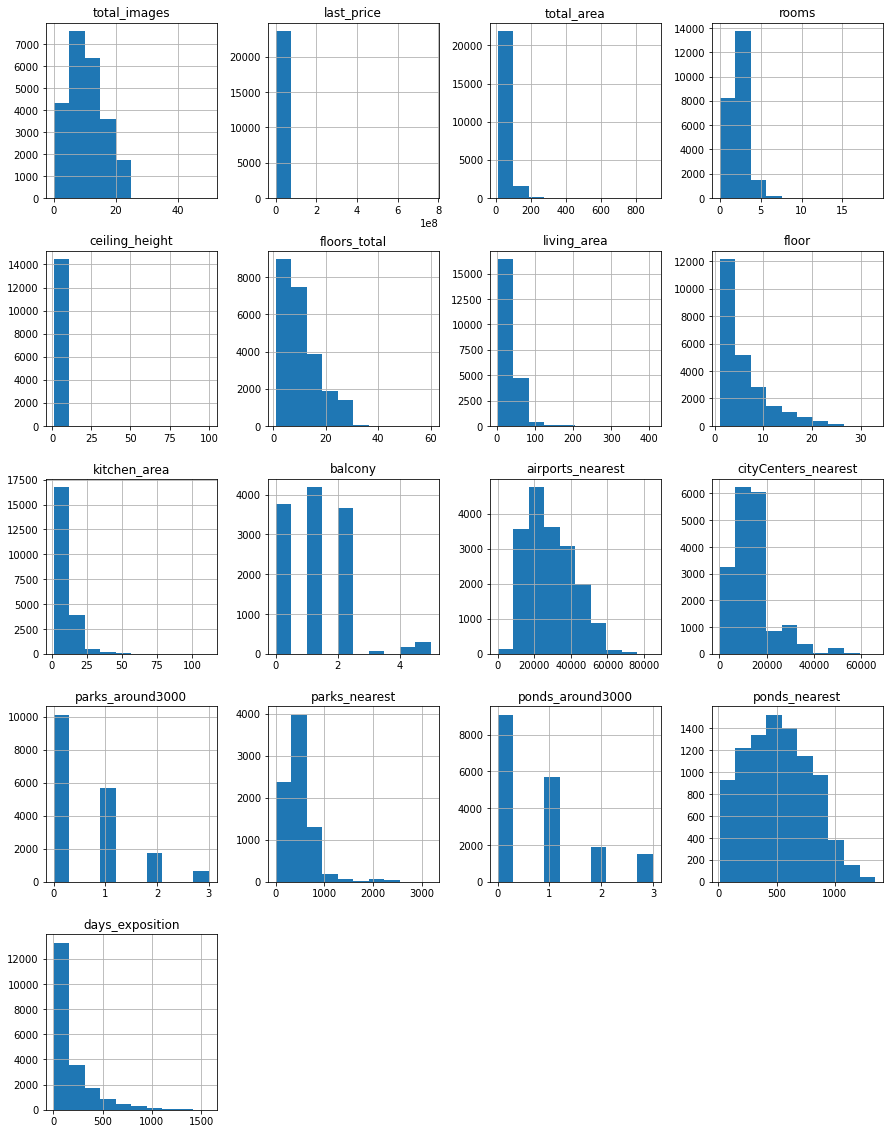

In [8]:
data.hist(figsize=(15, 20))

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
data.shape[0]

23699

Вывод: Проанализировав исходные данные понятно что всего почти 23700 строк и обнаружены значительные пропуски в столбцах: ceiling_height, living_area, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, 	parks_nearest, ponds_around3000, ponds_nearest, days_exposition. У большинства столбцов неверный тип данных(Категориальные), где должны быть количественные значения. Измменим их в далее.

### Предобработка данных

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод: Обнаружены пропущенные значения: ['ceiling_height'], ['floors_total'], ['living_area'], ['is_apartment'], ['kitchen_area'], ['balcony'], ['locality_name'], ['airports_nearest'], ['cityCenters_nearest'], ['parks_around3000'], ['parks_nearest'], ['ponds_around3000'], ['parks_nearest'], ['days_exposition'].
  Начнем с совсем малых пропущенных значениях это: ['floors_total'] и ['locality_name']. Будем считать что малая часть забыла указать значения. Нету мнения на этот счет.
Больше всего пропусков ['is_apartment'], думаю многие не разобрались в значении  колонки апартаменты , поэтому много пропусков.
Балконы ['balcony'] чуть меньше половины от общего кол-ва строк. Думаю, что люди моглли не предать стольмного значения балконам и решили пропустить, как  для ['parks_nearest'] и ['parks_nearest'] (больше половины пропусков)


In [12]:
spisok = ['last_price', 'total_area', 'ceiling_height', 'floors_total', 'living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',  'balcony', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

In [13]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [14]:
for col in spisok:
    try:
        data[col] = data[col].astype('int')
    except:
        data[col] = data[col].astype('float')
data.dtypes

total_images              int64
last_price                int64
total_area                int64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Вывод: Изначально почти все столбцы имели тип object(кроме total_images, rooms, studio, open_plan), было странно так многие столбцы с количественными значениями имели тип object. Я решил моменять почти все стоблцы, так как при долнейших расчетах и при постройке всяких графиков: гистограм, сильно облегчит мне задачу. Оставил только first_day_exposition, locality_name, is_apartment, так как они имеют качественные значения.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

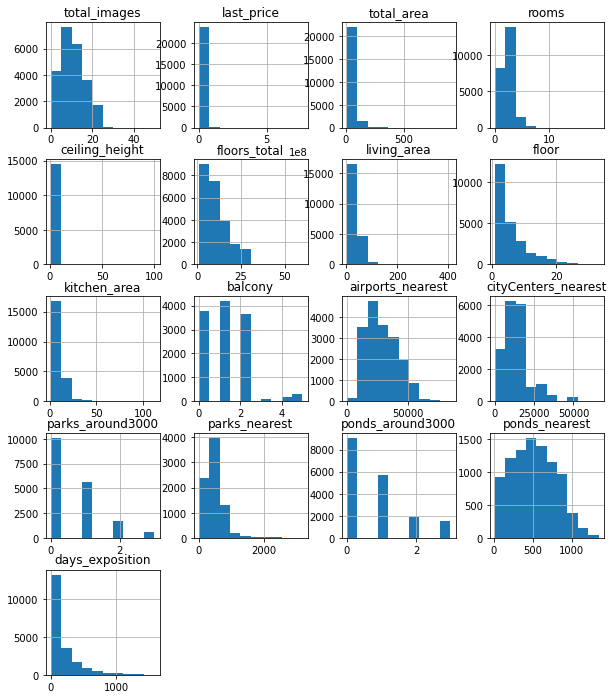

In [15]:
data.hist(figsize=(10,12))

In [16]:
spisok_na_0 = ['is_apartment', 'balcony']
for col in spisok_na_0:
    data.loc[data[col].isna(), col] = 0
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [17]:
spisok_na_median = ['ceiling_height']
for col in spisok_na_median:
    data.loc[data[col].isna(), col]=data[col].median()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:

#ЭТОТ МЕТОД ТАК ЖЕ РАБОТАЕТ, НО ГРАМОЗДКИЙ!!!(ДЛЯ СЕБЯ)

#data['locality_name'] = data['locality_name'].str.replace('посёлок', '')
#data['locality_name'] = data['locality_name'].str.replace('поселок', '')
#data['locality_name'] = data['locality_name'].str.replace('деревня', '')
#data['locality_name'] = data['locality_name'].str.replace('городского типа', '')
#data['locality_name'] = data['locality_name'].str.replace('городской', '')
#data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', '')
#data['locality_name'] = data['locality_name'].str.replace('село', '')
#data['locality_name'] = data['locality_name'].str.replace('при железнодорожной станции', '')
#data['locality_name'] = data['locality_name'].str.replace('коттеджный', '')
#data['locality_name'] = data['locality_name'].str.replace('станции', '')
#data['locality_name'] = data['locality_name'].str.replace('садовое', '')
#data['locality_name'] = data['locality_name'].str.replace('некоммерческое', '')


garbage = [
    'посёлок',
    'поселок',
    'городского типа',
    'садоводческое некоммерческое товарищество',
    'село',
    'при железнодорожной станции',
    'коттеджный',
    'станции',
    'садовое',
    'некоммерческое',
    'деревня',
    'городской',
    ' '
]
for value in garbage:
    data['locality_name'] = data['locality_name'].str.replace(value, '')
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].head(10)


0    Санкт-Петербург
1             Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
5            Янино-1
6          Парголово
7    Санкт-Петербург
8             Мурино
9    Санкт-Петербург
Name: locality_name, dtype: object

In [20]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'КрасныйБор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'НовоеДевяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский',
       'товариществоНоваяРопша', 'Павловск', 'Пикколово', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи',
       'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи',
       'Первомайское', 'КрасноеСело', 'Понтонный', 'Сясьстрой', 'Старая',
       'Лесколово', 'НовыйСвет', 'Сланцы', 'Путилово', 'Ивангород',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'СосновыйБор',
       'Оржицы', 'Кальтино', 'Романовка', 'Бугры', 'Рощино', 'Кириши',
       'Луга', 'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье',
       'Молодежное', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно',
       'Стрельна', 'Бокситог

In [1]:
data.duplicated().sum()

NameError: name 'data' is not defined

Заменили предложенные вами изменения. Удалены пробелы, устранили дубликаты и заменили ё на е методом replace

<AxesSubplot:>

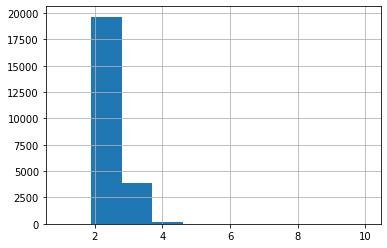

In [22]:
#data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = None
#data.isna().sum()

data.loc[data['ceiling_height']>17, 'ceiling_height'] = data.loc[data['ceiling_height']>17, 'ceiling_height'] / 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = None
data['ceiling_height'].hist()


# Вывод по данному этапу
В данном этапе мы проанализировали наборы данных. Оценили пропущенные значения и заполнили там где посчитали нужным пропущенные значения. Устранены неявные дубликаты в названиях населённых пунктов, путем определения уникальных значений для столбца locality_name. А также устранили редкие и выбивающиеся значения в столбце ceiling_height


По итогу мы не отбрасывали аномальные данные, а заменяли их на более приемлемые, соответственно размер данных не уменьшился.

<AxesSubplot:>

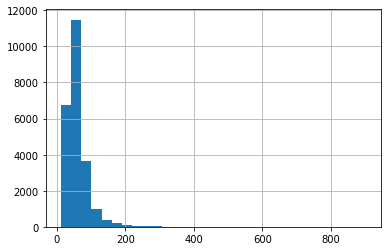

In [23]:
#код ревьюера
data['total_area'].hist(bins=30)

In [24]:
data['total_area'] = data.loc[data['total_area']< 300, 'total_area']

<AxesSubplot:>

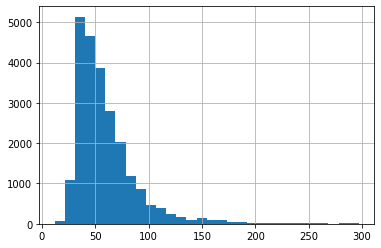

In [25]:
data['total_area'].hist(bins=30)

<AxesSubplot:>

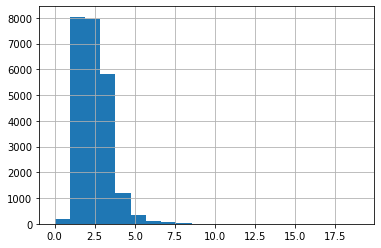

In [26]:
data['rooms'].hist(bins=20)

In [27]:
data['rooms'] = data.loc[data['rooms']< 8, 'rooms']

<AxesSubplot:>

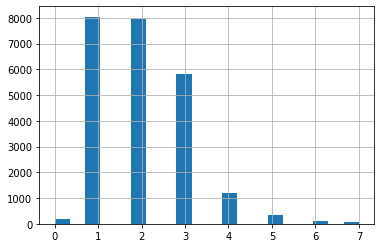

In [28]:
data['rooms'].hist(bins=20)

<AxesSubplot:>

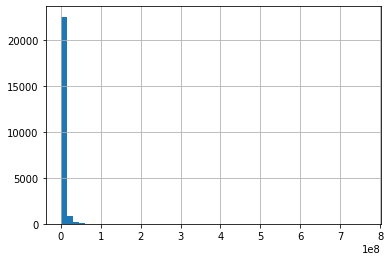

In [29]:
data['last_price'].hist(bins=50)

In [30]:
 variable = 50000000
data['last_price'] = data.query('last_price < @variable')

<AxesSubplot:>

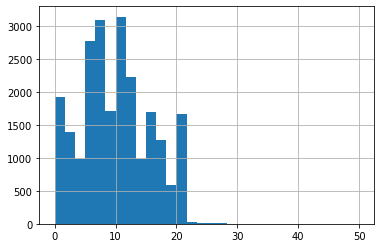

In [31]:
data['last_price'].hist(bins=30)

Вывод: На графике total_area что после 300 линии даже и не видно, поэтому в данном случае аномальными значениями можно считать все после 200-300, отбросим значения после. На графике видно, что в столбце rooms после 8 комнат линии не видно, значит можно считать аномальными значениями  после 7-8, отбросим их также.


In [32]:
#код ревьюера
data.describe()

,total_images,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,23636.000000,23668.000000,23697.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,59.202318,2.060250,2.697923,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,30.473181,1.035396,0.237257,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,69.000000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,297.000000,7.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23561 non-null  object 
 2   total_area            23636 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23668 non-null  float64
 5   ceiling_height        23697 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Посчитайте и добавьте в таблицу новые столбцы

In [34]:
#цена одного квадратного метра
data['price_for_1m2']= data['last_price']/data['total_area']
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2
0,20,20.0,108.0,2019-03-07T00:00:00,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185
1,7,7.0,40.0,2018-12-04T00:00:00,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175
2,10,10.0,56.0,2015-08-20T00:00:00,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571
3,0,NaN,159.0,2015-07-24T00:00:00,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,2.0,100.0,2018-06-19T00:00:00,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02


In [35]:
#день публикации объявления
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data['weekday'] = data['first_day_exposition'].dt.day_name()

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Thursday
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Tuesday
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Thursday
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Friday
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Tuesday


In [36]:
data.loc[:, 'weekday'] = data['weekday'].map({'Monday': 'Понедельник', 'Tuesday': 'Вторник', 'Wednesday': 'Среда', 'Thursday': 'Четверг', 'Friday': 'Пятница', 'Saturday': 'Суббота', 'Sunday': 'Воскресенье'})
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник


In [37]:
#месяц публикации объявления
data['month'] = data['first_day_exposition'].dt.month
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,3
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,12
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,8
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,7
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,6


In [38]:
data.loc[:, 'month'] = data['month'].map({1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель', 5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август', 9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12:'Декабрь'})
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,Март
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,Декабрь
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,Август
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,Июль
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,Июнь


In [39]:
#год публикации объявления
data['year'] = data['first_day_exposition'].dt.year
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month,year
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,Март,2019
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,Декабрь,2018
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,Август,2015
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,Июль,2015
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,Июнь,2018


In [40]:
data.dtypes

total_images                     int64
last_price                      object
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                          float64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
price_for_1m2                   object
weekday                         object
month                           object
year                     

In [41]:
data['floors_total'] = data['floors_total'].round()


In [42]:
#тип этажа квартиры
#data['type_floor'] = data['floor'].apply(lambda x: 'Первый' if (x == 1) elif  (x == x.floors_total) 'Последний' else 'Другой')
def condition(row):
    total_floors = row['floors_total']
    floor = row['floor']
    
    if floor==1:
        return "Первый"
    elif floor== total_floors:
        return "Последний"
    else:
        return 'Другой'
 

data['type_floor'] = data.apply(condition, axis=1)


In [43]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month,year,type_floor
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.00,8,0,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,Март,2019,Другой
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.60,1,0,False,False,11.00,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,Декабрь,2018,Первый
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.30,4,0,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,Август,2015,Другой
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,Июль,2015,Другой
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.00,13,0,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,Июнь,2018,Другой
5,10,10.0,30.0,2018-09-10,1.0,2.65,12.0,14.40,5,0,False,False,9.10,0.0,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.333333,Понедельник,Сентябрь,2018,Другой
6,6,6.0,37.0,2017-11-02,1.0,2.65,26.0,10.60,6,0,False,False,14.40,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.162162,Четверг,Ноябрь,2017,Другой
7,5,5.0,71.0,2019-04-18,2.0,2.65,24.0,NaN,22,0,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.070423,Четверг,Апрель,2019,Другой
8,20,20.0,33.0,2018-05-23,1.0,2.65,27.0,15.43,26,0,False,False,8.81,0.0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.606061,Среда,Май,2018,Другой
9,18,18.0,61.0,2017-02-26,3.0,2.50,9.0,43.60,7,0,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.295082,Воскресенье,Февраль,2017,Другой


In [44]:
#расстояние в км до центра города
data['cityCenters_nearest_in_km'] =(data['cityCenters_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month,year,type_floor,cityCenters_nearest_in_km
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,Март,2019,Другой,16.0
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,Декабрь,2018,Первый,19.0
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,Август,2015,Другой,14.0
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,Июль,2015,Другой,7.0
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,Июнь,2018,Другой,8.0


# Вывод:
На данном этапе мы определили цену для одного квадратного метра жилья и создали новую колонку. Обозначили день, месяц, год подачи заявки, определили тип квартиры по этажу. Перевели расстояние до центра города в км

### Проведите исследовательский анализ данных

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

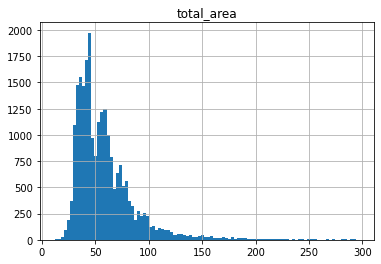

In [45]:
data.hist('total_area', bins=100)

In [46]:
data['total_area'].describe()

count    23636.000000
mean        59.202318
std         30.473181
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        297.000000
Name: total_area, dtype: float64

Вывод: По данной гистограмме и методу describe() ясно что больше всего людей выставляют свои квартиры на продажу с площадью 
40 m2 и в диапозоне от 25 до 50.
В свою очередь 75% персентайл мы можем считать точкой правее которой находятся квартиры которых меньше всего, но имеющие столь большой хвост. Есть квартиры с площадью 900 м2(моя гипотеза, что люди могли ошибиться при вводе значения и вместо 90м2 написали 900м2 ИМХО)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

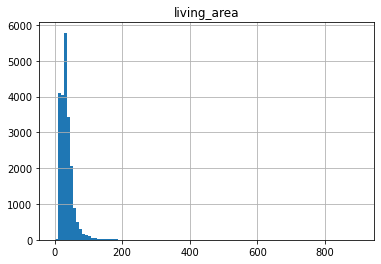

In [47]:
data.hist('living_area', bins=100, range=(0,900))
 

In [48]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Вывод: По данной гистограмме 'living_area' и методу describe() ясно что больше всего людей выставляют свои квартиры на продажу с площадью 
40 m2 и в диапозоне от 25 до 50.
В свою очередь 75% персентайл мы можем считать точкой правее которой находятся квартиры которых меньше всего, а это значения после 41м2, так же  имеющие столь большой хвост. Есть квартиры с площадью 409 м2(моя гипотеза, что люди могли ошибиться при вводе значения и вместо 40.9 м2 написали 409м2 ИМХО)

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

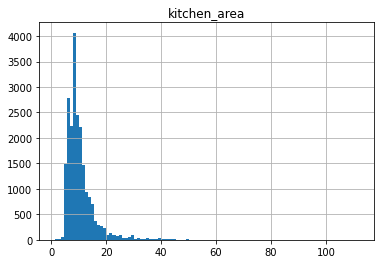

In [49]:
data.hist('kitchen_area', bins=100)

In [50]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Вывод: По данной гистограмме 'kitchen_area' и методу describe() ясно что больше всего людей выставляют свои квартиры на продажу с площадью 
7 m2 и в диапозоне от 6 до 8.
В свою очередь 75% персентайл мы можем считать точкой правее которой находятся квартиры которых меньше всего, а это значения после 11м2, так же  имеющие столь большой хвост. Есть квартиры с площадью 112 м2(моя гипотеза, что люди могли ошибиться при вводе значения и вместо 11.2 м2 написали 112м2 ИМХО)

<AxesSubplot:xlabel='last_price', ylabel='Count'>

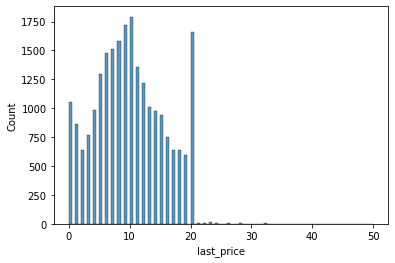

In [51]:
sns.histplot(data['last_price'], bins=100)

In [52]:
data['last_price'].describe()

count     23561.0
unique       38.0
top          10.0
freq       1791.0
Name: last_price, dtype: float64

Вывод: Наибольшее количество заявок с ценой от 2.5 до 4.0 10*7, значения с меьшими кол-вами заявок сильно смещени влево, есть значения как у максимальной 7.63 * 10*8(степень), но такие значения редкость. 

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

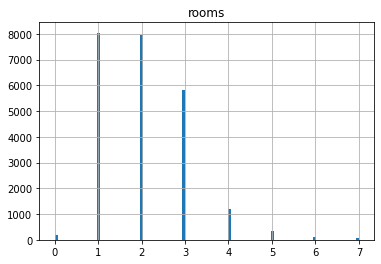

In [53]:
data.hist('rooms', bins=100)


In [54]:
data['rooms'].describe()

count    23668.000000
mean         2.060250
std          1.035396
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Вывод: Больше всего заявок у кв с 1 комнатой как видно на гистограмме и describe(), где показывает 25% персентайл. Больше всего квартир в диапозоне от 1 до 3 квартир. Есть и исключения на примере макс значения 19 комнат

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

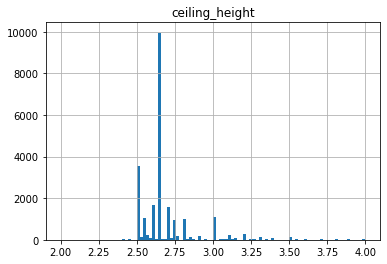

In [55]:
data.hist('ceiling_height', bins=100, range=(2,4))

In [56]:
data['ceiling_height'].describe()

count    23697.000000
mean         2.697923
std          0.237257
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

Вывод: как видно на гистограмме больше всего заявок с высотой 2.6 м, что и доказывет нам describe(), 25% персентайл соответствует 2.6м. Меньше всего это от 2.7 и правее. Есть также и аномалии как минимальное значение 1м и 4м, при макс знач 10м.

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

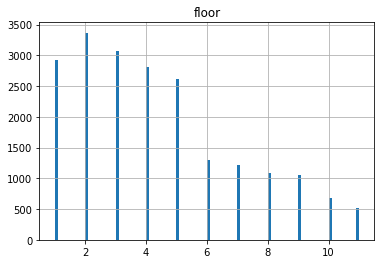

In [57]:
data.hist('floor', bins=100, range=(1,11))

In [58]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Вывод: Больше всего квартир на 2-ом этаже и диапозон от 1 до 5 квартир преобладают над основной массой. Думаю жто связо с тем что Питер исторический город и остались много советских домом с небольшой этажность они ипреобладают в городе особенно в центре, а новостроек с много этажностью мало. После отметки 8 и далее квартир становится мало.

<AxesSubplot:>

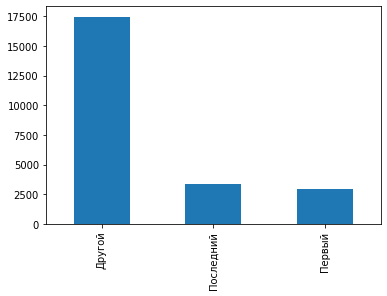

In [59]:
#sns.barplot(data['type_floor'])
data['type_floor'].value_counts().plot(kind='bar')

Вывод: Больше всего домой с Другой этажность, разница столь больша. А вот квартир на первом и последнем этажах пости одинакова,

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

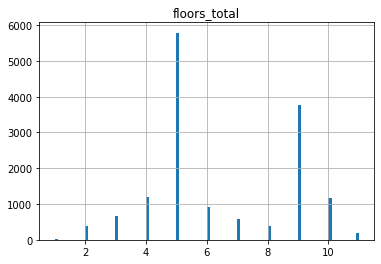

In [60]:
data.hist('floors_total', bins=100, range=(1,11))

In [61]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Вывод: Больше всего 5-и этажных домов преобладают над основной массой. А также дома с 9-ю этажами не сильно отстает, он же является медианой. Думаю жто связо с тем что Питер исторический город и остались много советских домом с небольшой этажность они и преобладают в городе, так же как я помню по советской планировке застраивались дома с 5-ю и 9-ю этажами особенно в центре, а новостроек с много этажностью мало. После отметки 16 этажей и далее квартир становится мало.

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

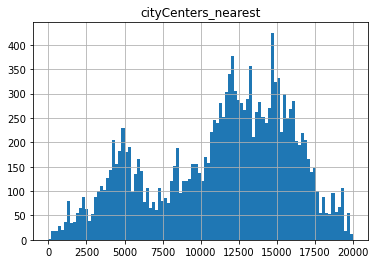

In [62]:
data.hist('cityCenters_nearest', bins=100, range=(0,20000))

In [63]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Вывод: Больше всего квартир с растоянием в почти 11000м и дапозон от 10000 до 13500 м. Видно сплошная линия, связано с тем что при заполнении пропущенных знач вы вставляли медиану. Меньше квартир после отметки в 15000м.

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

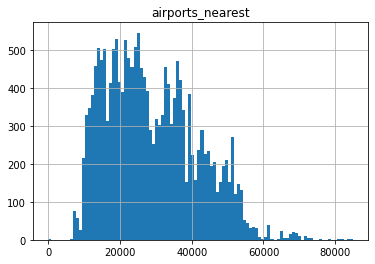

In [64]:
data.hist('airports_nearest', bins=100)

In [65]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Вывод: Больше всего квартир с растоянием в почти 18585м и дапозон от 10000 до 20000 м. Связано с тем что больше всего заявок в Питере и все более менее нахоюдятся в одном округе и растояние до аэропорта у всех +- одинаковая. 
Меньше квартир после отметки в 37000м. Это прилегающие к Питеру поселки и деревни.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

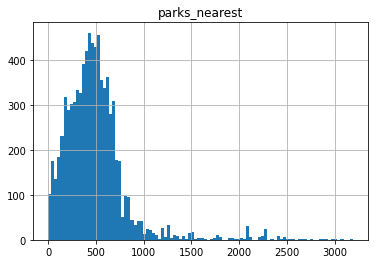

In [66]:
data.hist('parks_nearest', bins=100)

In [67]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Вывод: Больше всего квартир которые близко расположились к парку в дапозоне от 200 до 500 м. Связано с тем что больше всего заявок в Питере и все более менее нахоюдятся в одном округе и еще хочу заметить, что в Питере очень много парков. 
Меньше квартир после отметки в 600м. 

<AxesSubplot:>

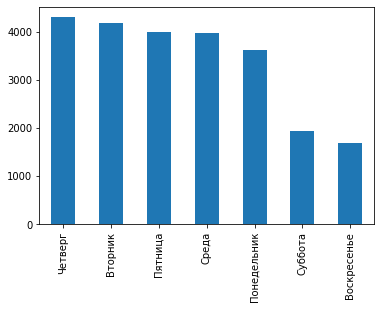

In [68]:
data['weekday'].value_counts().plot(kind='bar')

Вывод: Больше всего заявок подано при в четверг, да и в целом значения в будние дни расходения неболшие. Что не сказать о выходниых днях они в два раза меньше чем в будни. Думаю людям больше нравится подавать заявку по будням.

<AxesSubplot:>

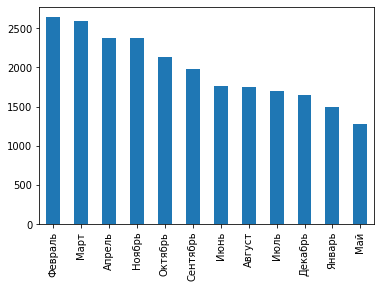

In [69]:
data['month'].value_counts().plot(kind='bar')

Больше всего заявок подано в Феврале и Марте почти одинаково, следом Аперль и Ноябрь такжже почти равны. 
Меньше всего в летние месяца и Май, думаю связано с тем, что в эти времена года люди начинают выходить в отпуск и им некогда заниматся продажой квартиры и оставляют на осеннее время. Декабрь и Январь, но тут все ясно НОВЫЙ ГОД, тут точно не когда и еще у всех обычно закрытие года на работе все заняты у всех суматоха

# Изучите, как быстро продавались квартиры

In [70]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month,year,type_floor,cityCenters_nearest_in_km
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,Март,2019,Другой,16.0
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,Декабрь,2018,Первый,19.0
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,Август,2015,Другой,14.0
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,Июль,2015,Другой,7.0
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,Июнь,2018,Другой,8.0


array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

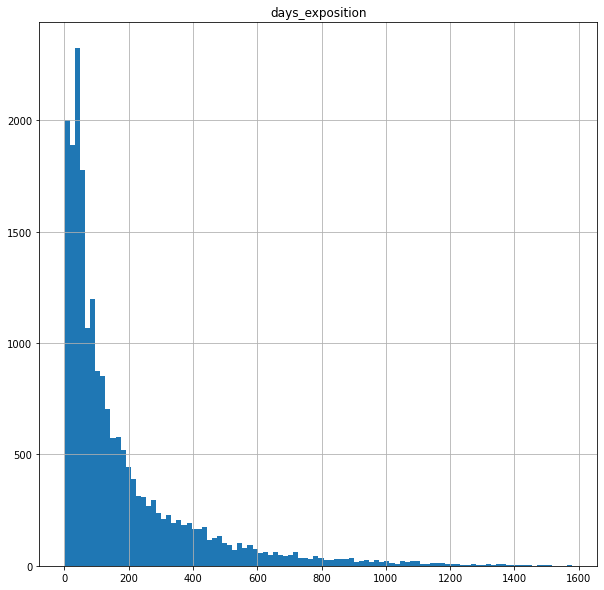

In [71]:
data.hist('days_exposition', bins=100, figsize=(10,10))

In [72]:
data['days_exposition'].mean()

180.88863436982163

In [73]:
data['days_exposition'].median()

95.0

In [74]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

# Вывод:
 
-  Исходя из данных мы можем считать 25% персентайл точкой левее которой находится значения квартир которые можно считать быстропродоющимися. В свою очередь 75% персентайл мы можем считать точкой правее которой находятся квартиры которые продоются относительно долго.

- До 45 дней-быстропродоющиеся, после 232 дней- долгопродоющиеся.

- Большое расхождения у mean и median, связанно с тем, что больше всего значений находится слева, соответственно медиана находится очень рано. А на среднее значение оказывают влияние все точки, в том числе большие значения справа.




# Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [75]:
data.dtypes

total_images                          int64
last_price                           object
total_area                          float64
first_day_exposition         datetime64[ns]
rooms                               float64
ceiling_height                      float64
floors_total                        float64
living_area                         float64
floor                                 int64
is_apartment                         object
studio                                 bool
open_plan                              bool
kitchen_area                        float64
balcony                             float64
locality_name                        object
airports_nearest                    float64
cityCenters_nearest                 float64
parks_around3000                    float64
parks_nearest                       float64
ponds_around3000                    float64
ponds_nearest                       float64
days_exposition                     float64
price_for_1m2                   

In [76]:
data['last_price'] = pd.to_numeric(data['last_price'], errors='coerce') 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

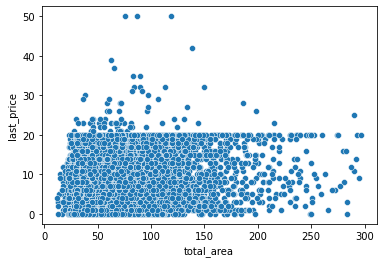

In [77]:
plt.figsize=(10,10)
sns.scatterplot(data = data[data['last_price']<100000000], x = 'total_area', y = 'last_price')


In [78]:
data['last_price'].corr(data['total_area'])

0.11589972607128092

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

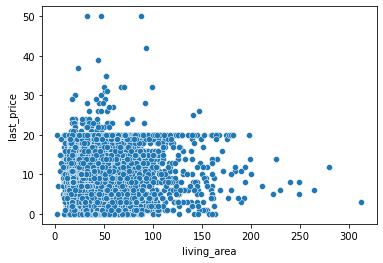

In [79]:
sns.scatterplot(data = data[data['last_price']<100000000], x = 'living_area', y = 'last_price')

In [80]:
data['last_price'].corr(data['living_area'])

0.0954815264520662

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

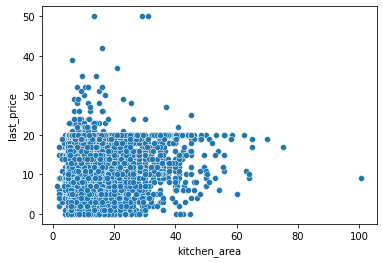

In [81]:
sns.scatterplot(data = data[data['last_price']<100000000], x = 'kitchen_area', y = 'last_price')

In [82]:
data['last_price'].corr(data['kitchen_area'])

0.10007723813069551

Чем больше площадь тем соответственно и больще цена, но есть выбросы. Есть квартиры у которых площадь маленькая но они дорогие и есть квартиры с большой площадью но дешёвые. Думаю, что большая зависимость цены от плащади квартиры, что и соответствует корреляция. Она наибальшая из всех зависимостей от площади

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

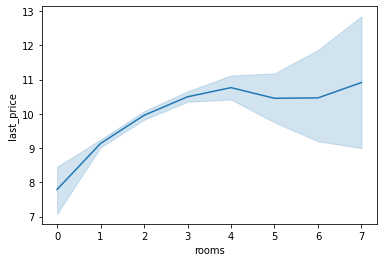

In [83]:
sns.lineplot(data = data[data['last_price']<100000000], x = 'rooms', y = 'last_price')

Вывод:
Можно считать что при отрезке от 0 до 7, является явным и цена квартиры зависит от количиства комнат. Есть сильный рост в цене при 15 комнатах(скорее всего это вызвано наличием нескольких значении  в этой области)

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

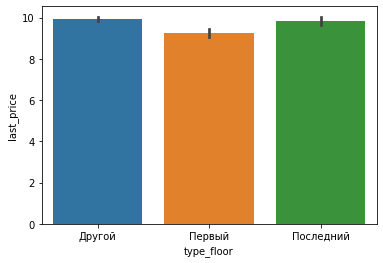

In [84]:
sns.barplot(data = data, x = 'type_floor', y = 'last_price')

Вывод: Самые дорогие квартиры которые находятся на последем этаже, самые дешевые находятся на первом этаже. Квартирыы которые находятся на других этажах дороже чем квартиры которые находятся на первом этаже. И самое сильное расхождение у квартир которые находятся на последнем этаже.

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

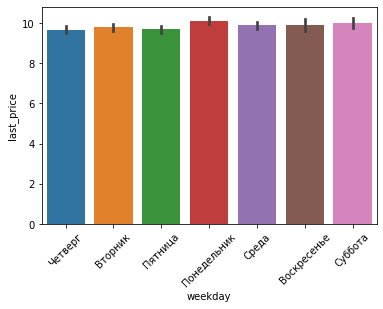

In [85]:
plt.xticks(rotation=45)
sns.barplot(data = data, x = 'weekday', y = 'last_price')

<AxesSubplot:xlabel='month', ylabel='last_price'>

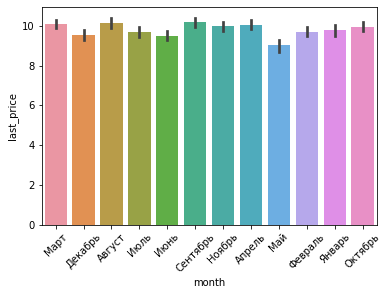

In [86]:
plt.xticks(rotation=45)
sns.barplot(data = data, x = 'month', y = 'last_price')

<AxesSubplot:xlabel='year', ylabel='last_price'>

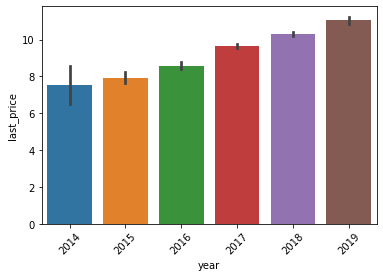

In [87]:
plt.xticks(rotation=45)
sns.barplot(data = data, x = 'year', y = 'last_price')

In [88]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1m2,weekday,month,year,type_floor,cityCenters_nearest_in_km
0,20,20.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,0,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.185185,Четверг,Март,2019,Другой,16.0
1,7,7.0,40.0,2018-12-04,1.0,2.65,11.0,18.6,1,0,False,False,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.175,Вторник,Декабрь,2018,Первый,19.0
2,10,10.0,56.0,2015-08-20,2.0,2.65,5.0,34.3,4,0,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.178571,Четверг,Август,2015,Другой,14.0
3,0,NaN,159.0,2015-07-24,3.0,2.65,14.0,NaN,9,0,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Пятница,Июль,2015,Другой,7.0
4,2,2.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,0,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.02,Вторник,Июнь,2018,Другой,8.0


Вывод: День и месяц размещения не имеет критичного значения на цену. А вот год размещения имеет большее значение и на это могут  влиять разные факторы: кризиз, курс доллара и т.д. Так как год это более глобальный признак, то такие факторы могут меняться, соответственно будет меняться цена.  

# Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах

In [89]:
top_10 = data.groupby('locality_name').size().sort_values(ascending=False).head(10).reset_index()['locality_name'].tolist()
top_10

['Санкт-Петербург',
 'Мурино',
 'Кудрово',
 'Шушары',
 'Всеволожск',
 'Пушкин',
 'Колпино',
 'Парголово',
 'Гатчина',
 'Выборг']

In [90]:
data[data['locality_name'].isin(top_10)].groupby('locality_name')['last_price'].mean().sort_values(ascending= False)

locality_name
Всеволожск         10.253769
Санкт-Петербург    10.152153
Выборг              9.679325
Кудрово             9.633475
Пушкин              9.330623
Гатчина             9.009772
Колпино             8.855030
Шушары              8.800000
Парголово           8.694190
Мурино              8.584746
Name: last_price, dtype: float64

<AxesSubplot:xlabel='cityCenters_nearest_in_km', ylabel='last_price'>

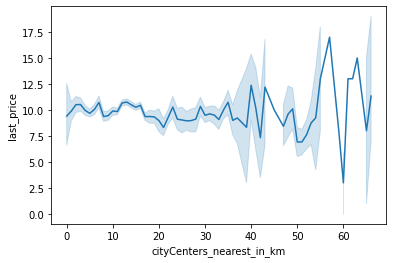

In [91]:
sns.lineplot(data = data, x = 'cityCenters_nearest_in_km', y = 'last_price')

# Теперь выделите квартиры в Санкт-Петербурге

<AxesSubplot:xlabel='cityCenters_nearest_in_km', ylabel='last_price'>

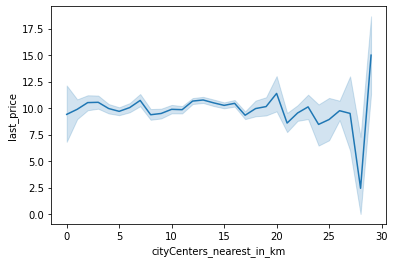

In [92]:
sns.lineplot(data = data[data['locality_name'] == 'Санкт-Петербург'], x = 'cityCenters_nearest_in_km', y = 'last_price')

<AxesSubplot:xlabel='cityCenters_nearest_in_km', ylabel='last_price'>

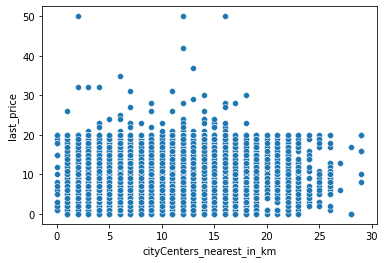

In [93]:
sns.scatterplot(data = data[data['locality_name'] == 'Санкт-Петербург'], x = 'cityCenters_nearest_in_km', y = 'last_price')

In [94]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_in_km')['last_price'].mean()

cityCenters_nearest_in_km
0.0      9.409091
1.0      9.887640
2.0     10.520690
3.0     10.549133
4.0      9.960236
5.0      9.693946
6.0     10.049069
7.0     10.726582
8.0      9.374790
9.0      9.494098
10.0     9.885953
11.0     9.851190
12.0    10.664174
13.0    10.768016
14.0    10.496482
15.0    10.259566
16.0    10.451383
17.0     9.328426
18.0     9.957854
19.0    10.146497
20.0    11.387755
21.0     8.589744
22.0     9.539604
23.0    10.117647
24.0     8.461538
25.0     8.923077
26.0     9.754717
27.0     9.500000
28.0     2.428571
29.0    15.000000
Name: last_price, dtype: float64

Вывод: Стоимость объектов напрямую зависит от расстояния до центра города, то есть чем ближе к центру города тем цена квартиры выше. 

Город заканчивается на 29 км

# Обобщеный вывод по данному заданию
Стоимость объектов напрямую зависит от расстояния до центра города, т.е. чем квартира блиде к центру тем тем она и дороже.
Видно в ячейке выше. Конечно так же есть другие факторы имеющие значение, но еще одна важная величина это площади квартиры, при одинаковом расстоянии к центру города кварира с тремя комнатами будет стоить дороже чем квартира с двумя.

# Вывод по данному этапу:
Мы изучили и описали исходные параметры, построили для каждого гистограмму. Определили, как быстро продавались квартиры, до 45 дней-быстропродоющиеся, после 232 дней- долгопродоющиеся. Определили что цена квартиры зависит от того как близко она расположена к центру и кол-во комнат.

### Общий вывод

Мы получили общее представление о данных до чёткого понимания, какие из них надёжные, а какие — нет. Научились проверять их на каждом этапе, смотреть типичные значения, выбросы и распределения. Оценили пропущенные значения и заполнили там где посчитали нужным пропущенные значения. Устранили неявные дубликаты в названиях населённых пунктов. А также устранили редкие и выбивающиеся значения в столбце ceiling_height. Определили цену для одного квадратного метра жилья и создали новую колонку. Перевели расстояние до центра города в км.
Несмотря на довольно серьёзные проблемы в исходных данных, мы изучили и описали исходные параметры, построили для каждого гистограмму. Определили, как быстро продавались квартиры, до 45 дней-быстропродоющиеся, после 232 дней- долгопродоющиеся. Определили что цена квартиры зависит от того как близко она расположена к центру и кол-во комнат. 

В общем и целом исходя из проделанного проекта мы обнаружили интересные особенности и зависимости, которые существуют на рынке недвижимости. 

Выводя разлчные зависимости понятно, что на цену различные показатели, чем квартира ближе к  центру города тем она и дороже и в среднем квартиру можно продать до 100 дней( хороший показатель). Площадь так же один важнейщих показателей, то есть тем больше площадь, тем дороже квартира.Этаж на котором находится квартира тоже важна, квартира которая располодена на последнем этаже будет дороже всего, далее квартиры на других этажах и дешевле всего квартира на первом этаже. 
Время публикации. лучше всего выкладывать в феврале и апреле. День публикации особо не имеет значения. А вот год, очень важен, за последние 4 года цены за квартиру еменьшились почти в два раза. Хотя цена за 19 слегка увеличилась по сравнению с 18, надеюсь намечается тенденция на рост.  Расстояние до ближайшего аэропорта ил парка не столь значимаий параметр для продажи, но все равно важен.
Ну и дороже всего кввартиры в самом Питере, это имее болльшее значение. Цены конечно удивляют.

Люди частенько, пропускают заполнения значений которых не знают или не считают нужным в заполнений, это кол-во: болконов, парков и прудов в близи и т.д.

Сфера недвижимости очень интересна, но и имеет много подводных камней и зависимотей. Которые могут повлият на окончательную цену. Которую нужно изучать.